## Import neccesary libraries

In [1]:
import pandas as pd
import numpy as np

## Import data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dealing with missing values

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
## Fill missing categorical value with the mode
df.Gender.fillna(df.Gender.mode().values[0], inplace=True)

df.Married.fillna(df.Married.mode().values[0], inplace=True)

df.Dependents.fillna(df.Dependents.mode().values[0], inplace=True)

df.Self_Employed.fillna(df.Self_Employed.mode().values[0], inplace=True)

## Fill missing numerical value with the mean
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)

df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

df.Credit_History.fillna(df.Credit_History.mean(), inplace=True)

In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Prep data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
## Convert binary data into boolean 1 OR 0
df = df.replace({
                    'Gender': {
                        'Male': 1,
                        'Female': 0
                    },
                    'Married': {
                        'Yes': 1,
                        'No': 0
                    },
                    'Education': {
                        'Graduate': 1,
                        'Not Graduate': 0
                    },
                    'Self_Employed': {
                        'Yes': 1,
                        'No': 0
                    },
                    'Loan_Status': {
                        'Y': 1,
                        'N': 0
                    }
                })

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [8]:
## Drop Loan_ID
df = df.drop(['Loan_ID'], axis=1)

## Define label and features

In [9]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

## Create dummy variables

In [10]:
print(df['Dependents'].unique())
print(df['Property_Area'].unique())

['0' '1' '2' '3+']
['Urban' 'Rural' 'Semiurban']


In [11]:
x = pd.get_dummies(x)
x.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1


## Split training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=66)

## Create model

In [13]:
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

C:\Users\arthur.loh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Evaluate performance

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, x, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 31  28]
 [ 17 127]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.65      0.53      0.58        59
           1       0.82      0.88      0.85       144

    accuracy                           0.78       203
   macro avg       0.73      0.70      0.71       203
weighted avg       0.77      0.78      0.77       203



=== All AUC Scores ===
[0.78081395 0.79360465 0.65789474 0.64473684 0.80952381 0.75814536
 0.88533835 0.75689223 0.72117794 0.68984962]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7497977501894272


## Features importance

In [15]:
feature_list = x.columns

# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Credit_History       Importance: 0.28
Variable: ApplicantIncome      Importance: 0.18
Variable: LoanAmount           Importance: 0.17
Variable: CoapplicantIncome    Importance: 0.12
Variable: Loan_Amount_Term     Importance: 0.05
Variable: Gender               Importance: 0.02
Variable: Married              Importance: 0.02
Variable: Education            Importance: 0.02
Variable: Self_Employed        Importance: 0.02
Variable: Dependents_1         Importance: 0.02
Variable: Dependents_3+        Importance: 0.02
Variable: Property_Area_Rural  Importance: 0.02
Variable: Property_Area_Semiurban Importance: 0.02
Variable: Property_Area_Urban  Importance: 0.02
Variable: Dependents_0         Importance: 0.01
Variable: Dependents_2         Importance: 0.01


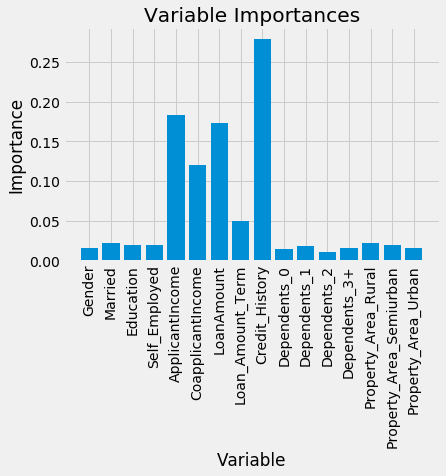

In [16]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Tuning hyperparameters

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
     'n_estimators': n_estimators,
     'max_features': max_features,
     'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)

# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


{'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': None}


## Rebuild model with best parameters

In [20]:
rfc = RandomForestClassifier(n_estimators=800, max_features='sqrt',  max_depth=None)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

rfc_cv_score = cross_val_score(rfc, x, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 28  31]
 [  5 139]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.47      0.61        59
           1       0.82      0.97      0.89       144

    accuracy                           0.82       203
   macro avg       0.83      0.72      0.75       203
weighted avg       0.83      0.82      0.80       203



=== All AUC Scores ===
[0.78372093 0.79069767 0.70112782 0.68358396 0.76378446 0.80137845
 0.90914787 0.72869674 0.71491228 0.76566416]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7642714343999534


## Visualizing a Single Decision Tree

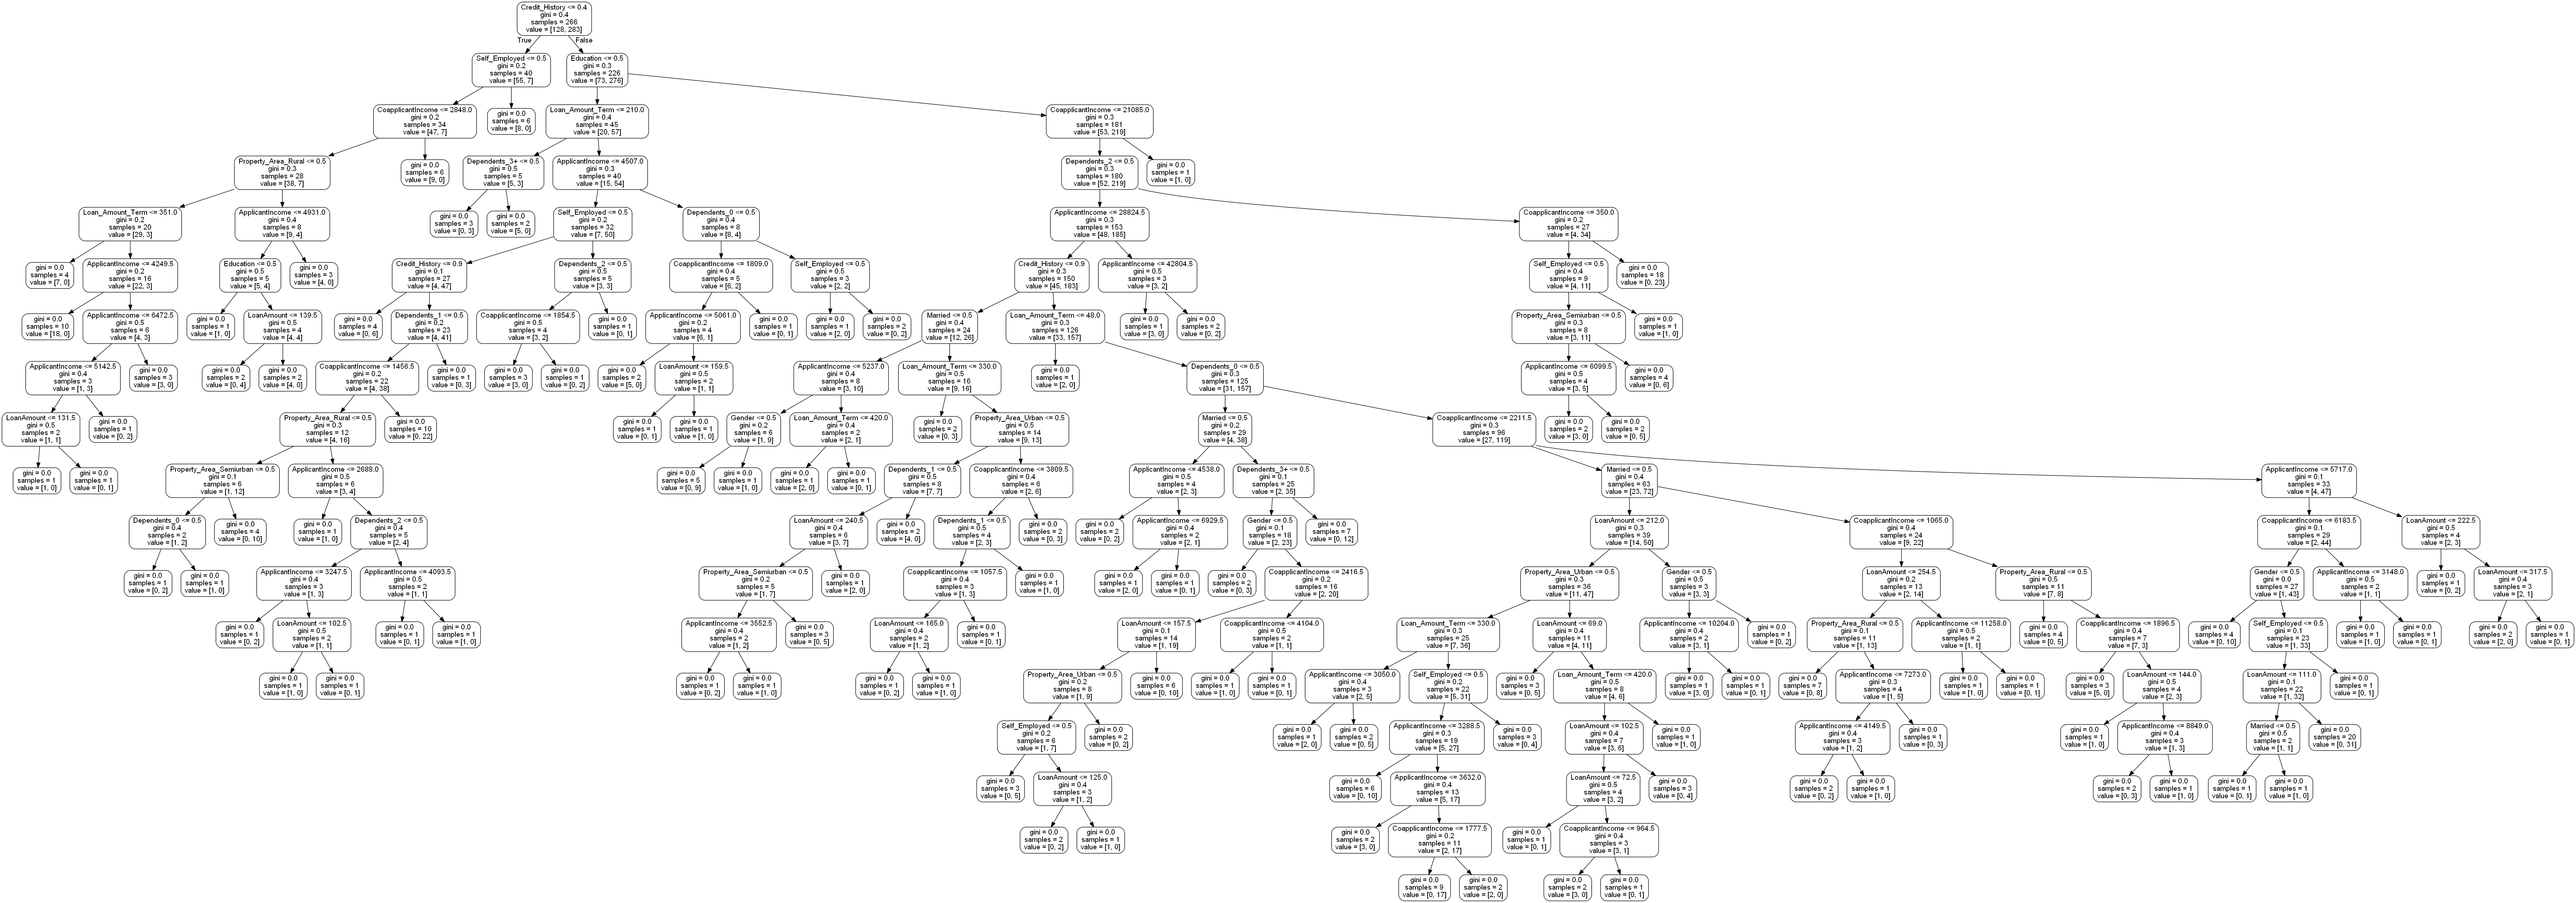

In [19]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Pull out one tree from the forest
tree = rfc.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rfc.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

Image(graph.create_png())